In [78]:
# Importing modules

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
# Reading in data
df = pd.read_csv("phishing.csv")

In [80]:
# Examining dataframe 
df.head()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [81]:
# Checking for NA
df.isna()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
# Checking for NULL
df.isnull()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
# Verifying that all values are not null
df.notnull()


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11050,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11051,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
11052,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [84]:
# Extracting labels
labels = df.loc[:, ~df.columns.str.contains('class')]
labels


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,1,-1,1,0,1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,1,-1,1,1,1,1,-1,1,1,1


In [85]:
# Extracting target
target = df['class']
target



0       -1
1       -1
2       -1
3        1
4        1
        ..
11049    1
11050   -1
11051   -1
11052   -1
11053   -1
Name: class, Length: 11054, dtype: int64

In [86]:
# Train test split
training_labels, testing_labels, training_target, testing_target  = train_test_split(labels, target, random_state = 42, )


In [87]:
# Populating a list of classifiers with hyperparameters
classifiers = [
    LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    SVC(kernel='rbf', C=1.0, gamma='scale'),
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42),
    DecisionTreeClassifier(max_depth=10, random_state=42),
    KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()
]

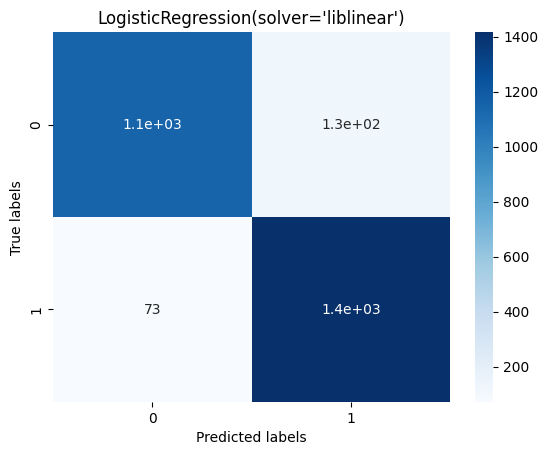

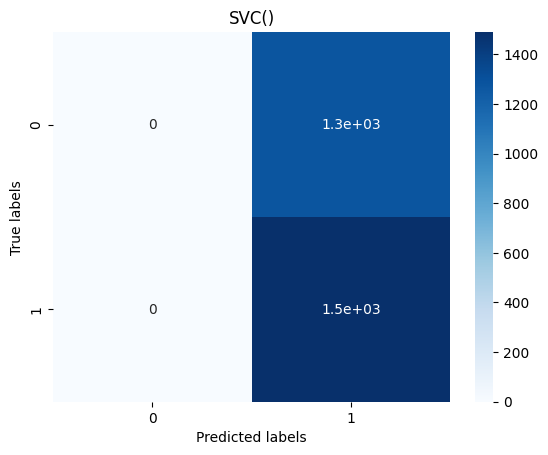

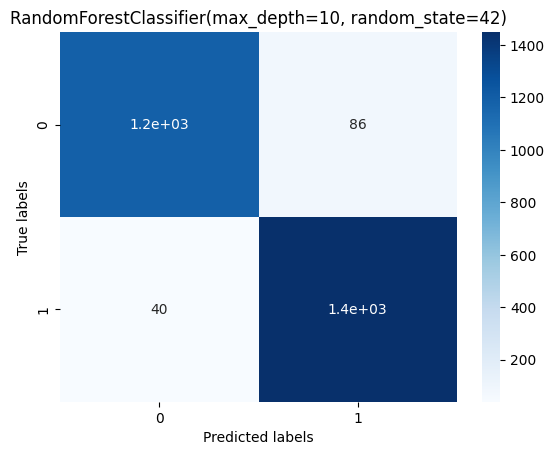

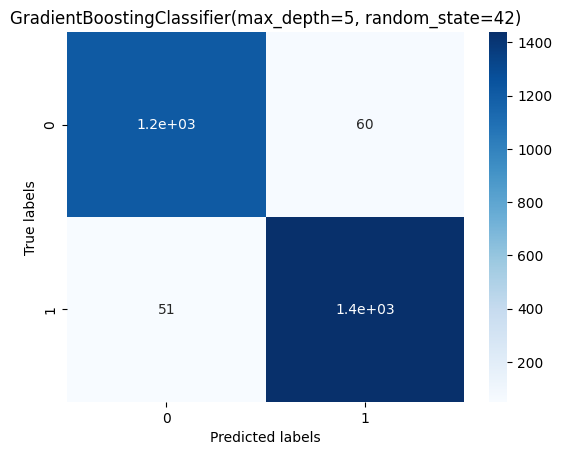

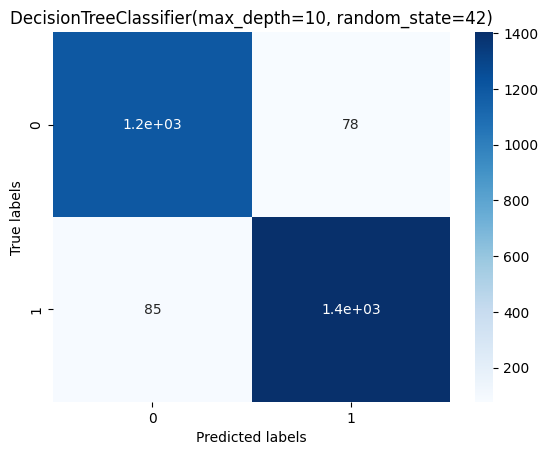

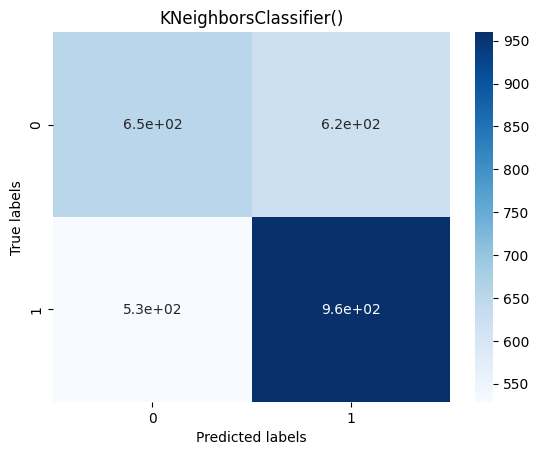

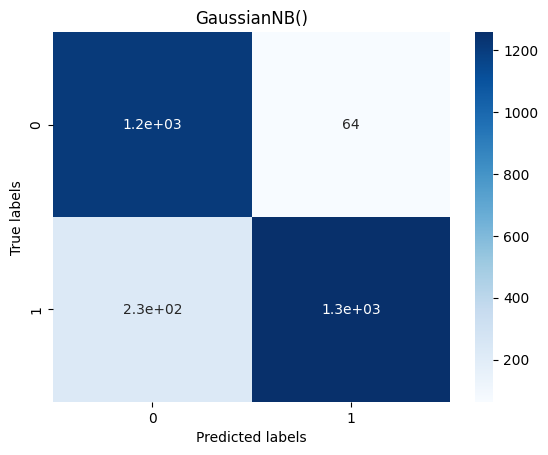

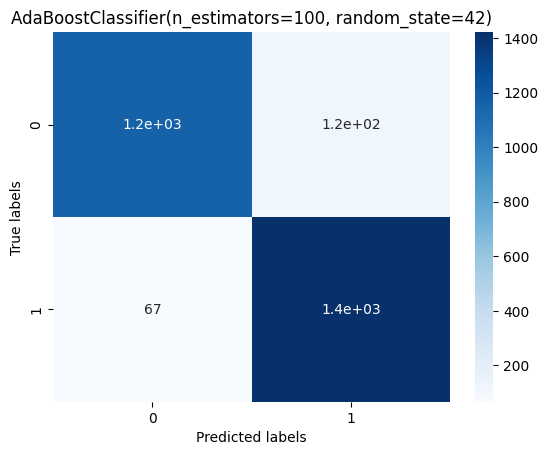

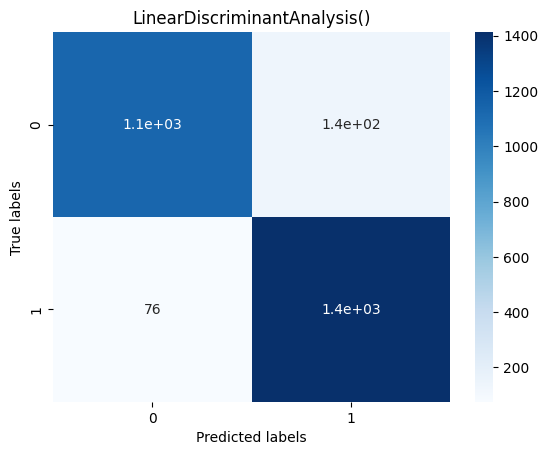

c:\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


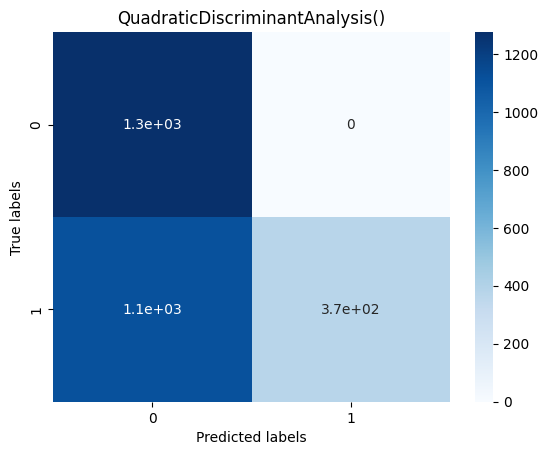

In [91]:
# Dictionary to store prediction data
predictions = {}

# Iterating over all classifiers
for classifier in classifiers:

    # Fitting classifier
    classifier.fit(training_labels, training_target)

    # Updating predictions dict
    predictions[str(classifier)] = classifier.predict(testing_labels)

    # Obtaining confusion matrix
    cm = confusion_matrix(y_pred= predictions[str(classifier)], y_true = testing_target)

    # Plotting confusion matrix
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(str(classifier))
    plt.show()

  


In [89]:
# Obtaining metrics - accuracy, f1, recall, precision

metrics = { 'accuracy': [], 'f1' : [], 'recall' : [], 'precision' : []  }
for classifier_name, prediction in predictions.items():
    metrics['accuracy'].append(accuracy_score(testing_target, prediction))
    metrics['f1'].append(f1_score(testing_target, prediction, average='weighted'))
    metrics['recall'].append(recall_score(testing_target, prediction, average='weighted'))
    metrics['precision'].append(precision_score(testing_target, prediction, average='weighted'))
    

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


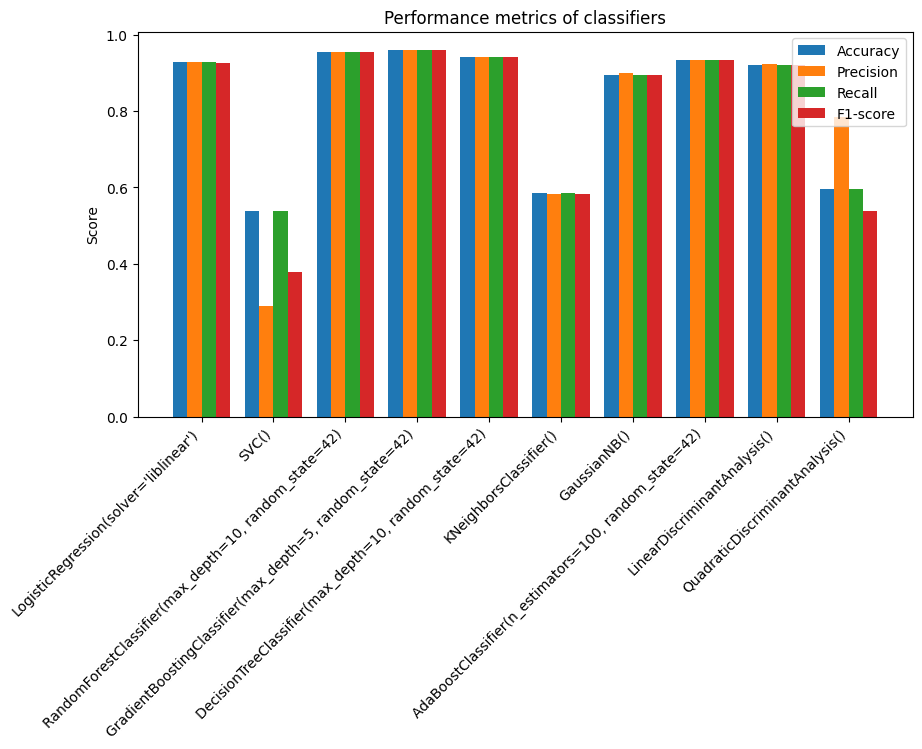

In [90]:
# Examining the performance metrics using a bar chart

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(classifiers))
width = 0.2
rects1 = ax.bar(x - width*1.5, metrics['accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - width*0.5, metrics['precision'], width, label='Precision')
rects3 = ax.bar(x + width*0.5, metrics['recall'], width, label='Recall')
rects4 = ax.bar(x + width*1.5, metrics['f1'], width, label='F1-score')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha='right')
ax.legend()
ax.set_ylabel('Score')
ax.set_title('Performance metrics of classifiers')
plt.show()